# **Movie Recommendation**

The dataset at hand contains records of movies watched by users and their ratings. Your job is to extract relations of the movies watched by a user and recommend movies to a user based on the previously watched movies. This is same as youtube recommending videos to you saying people who watched this video also watched this, or maybe like Netflix or Amazon prime recommending you other movies or series based on your watch history and of others who have watched the same movies as you.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the data**

In [39]:
ratings_df = pd.read_csv('/content/ratings.csv')
movies_df = pd.read_csv('/content/movies_metadata.csv')

<ipython-input-39-facf692c4610>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('/content/movies_metadata.csv')


In [40]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1.425942e+09
1,1,147,4.5,1.425942e+09
2,1,858,5.0,1.425942e+09
3,1,1221,5.0,1.425942e+09
4,1,1246,5.0,1.425942e+09


In [41]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289766 entries, 0 to 289765
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     289766 non-null  int64  
 1   movieId    289766 non-null  int64  
 2   rating     289766 non-null  float64
 3   timestamp  289765 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 8.8 MB


In [42]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [43]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

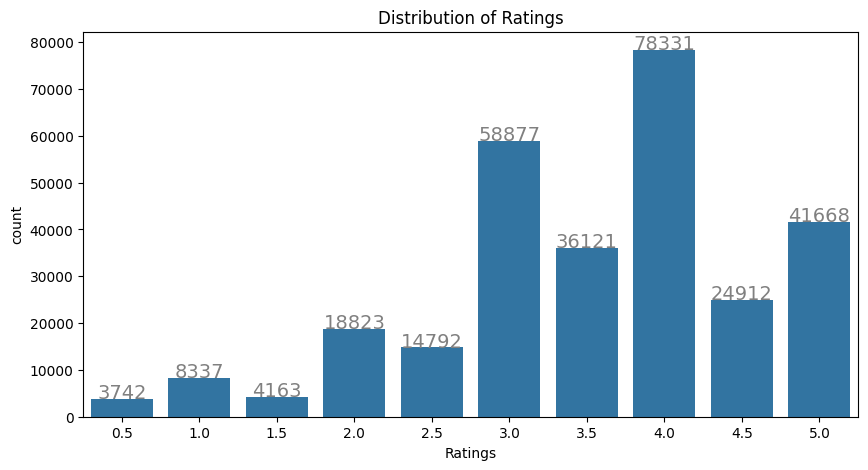

In [46]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=ratings_df, x='rating')
labels = (ratings_df['rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='grey')
plt.show()

**The ratings distribution shows that there are relatively fewer movies that are lower rated. This can be because most of the users who didn't like the movie, didn't care enough to rate the movie. You should note this, it can be useful later. As you wouldn't want to recommend movies with relatively low number of ratings as users probably didn't like them.**

# **Clean the Data**

In [47]:
title_mask = movies_df['title'].isna()

In [48]:
movies_df = movies_df.loc[title_mask == False]

In [49]:
movies_df = movies_df.astype({'id': 'int64'})

In [50]:
df = pd.merge(ratings_df, movies_df[['id', 'title']], left_on='movieId', right_on='id')
df.head()

,userId,movieId,rating,timestamp,id,title
0,1,110,1.0,1.425942e+09,110,Three Colors: Red
1,11,110,3.5,1.231677e+09,110,Three Colors: Red
2,22,110,5.0,1.111937e+09,110,Three Colors: Red
3,24,110,5.0,9.798700e+08,110,Three Colors: Red
4,29,110,3.0,1.044020e+09,110,Three Colors: Red


# **Id column is repeated and the timestamp is not important for this problem. So, you can drop the two.**

In [52]:
df.drop(['timestamp', 'id'], axis=1, inplace=True)

**The apriori model needs data in a format such that the userId forms the index, the columns are the movie titles and the values can be 1 or 0 depending on whether that user has watched the movie of the corresponding column. The resulting data is like a user's watchlist, for each userId, having 1 in columns of the movies that the user has watched and 0 otherwise.       
       
You can achieve this by using pivot on the dataframe. To do so you need to first make sure there are no duplicate records for the combination of userId and title.**

In [53]:
df = df.drop_duplicates(['userId','title'])

In [54]:
df_pivot = df.pivot(index='userId', columns='title', values='rating').fillna(0)

**You need to convert the ratings to 0 or 1 and also convert all float values to int.**

In [55]:
df_pivot = df_pivot.astype('int64')

In [56]:
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

df_pivot = df_pivot.applymap(encode_ratings)

In [57]:
df_pivot.head()

title,!Women Art Revolution,$5 a Day,'Gator Bait,'R Xmas,'Twas the Night Before Christmas,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zombie Holocaust,Zozo,Zvenigora,eXistenZ,xXx,¡A volar joven!,À nos amours,Ödipussi,Şaban Oğlu Şaban,Šíleně smutná princezna
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Train the Model**

In [58]:
from mlxtend.frequent_patterns import apriori

frequent_itemset = apriori(df_pivot, min_support=0.07, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [59]:
frequent_itemset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.079587,"(20,000 Leagues Under the Sea)"
1,0.085914,(2001: A Space Odyssey)
2,0.217449,(48 Hrs.)
3,0.222111,(5 Card Stud)
4,0.101232,(A Clockwork Orange)


In [60]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(5 Card Stud),(48 Hrs.),0.222111,0.217449,0.073926,0.332834,1.530627,0.025628,1.172947,0.445659
1,(48 Hrs.),(5 Card Stud),0.217449,0.222111,0.073926,0.339969,1.530627,0.025628,1.178565,0.443004
2,(48 Hrs.),(A Clockwork Orange),0.217449,0.101232,0.078255,0.359877,3.554974,0.056242,1.404056,0.918412
3,(A Clockwork Orange),(48 Hrs.),0.101232,0.217449,0.078255,0.773026,3.554974,0.056242,3.447760,0.799655
4,(A Nightmare on Elm Street),(48 Hrs.),0.164835,0.217449,0.107226,0.650505,2.991526,0.071383,2.239090,0.797115


# Interpret the Results
**Let's sort the result by descending order of lift. So that the most likely movie that the user will watch is recommended first.**

In [62]:
df_res = rules.sort_values(by=['lift'], ascending=False)
df_res.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14687,"(Syriana, Lost in Translation)","(The Conversation, Bang, Boom, Bang)",0.087579,0.123876,0.071928,0.821293,6.629952,0.061079,4.902566,0.930677
14690,"(The Conversation, Bang, Boom, Bang)","(Syriana, Lost in Translation)",0.123876,0.087579,0.071928,0.580645,6.629952,0.061079,2.175773,0.969234
14686,"(Syriana, The Conversation)","(Lost in Translation, Bang, Boom, Bang)",0.103563,0.105561,0.071928,0.694534,6.579448,0.060996,2.928110,0.945980
14691,"(Lost in Translation, Bang, Boom, Bang)","(Syriana, The Conversation)",0.105561,0.103563,0.071928,0.681388,6.579448,0.060996,2.813569,0.948093
14252,"(Back to the Future Part II, The Conversation)","(Rain Man, Lost in Translation)",0.111222,0.105894,0.077256,0.694611,6.559485,0.065478,2.927759,0.953612


**Let's see what your model recommends to someone who has watched the Men in Black II.**

In [63]:
df_MIB = df_res[df_res['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'Men in Black II')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
df_MIB = df_MIB[df_MIB['lift'] > 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
df_MIB.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5523,(Men in Black II),"(Bridge to Terabithia, Solaris)",0.198468,0.102897,0.070929,0.357383,3.473203,0.050507,1.396014,0.888401
6976,(Men in Black II),"(Point Break, Solaris)",0.198468,0.104229,0.071262,0.359060,3.444915,0.050576,1.397590,0.885451
16835,(Men in Black II),"(Terminator 3: Rise of the Machines, Sleepless...",0.198468,0.105894,0.072261,0.364094,3.438284,0.051244,1.406035,0.884752
5530,(Men in Black II),"(Terminator 3: Rise of the Machines, Bridge to...",0.198468,0.106227,0.072261,0.364094,3.427505,0.051178,1.405511,0.883611
5890,(Men in Black II),"(Terminator 3: Rise of the Machines, Dawn of t...",0.198468,0.106227,0.070929,0.357383,3.364325,0.049846,1.390832,0.876776


You have a bunch of recommendation there. Let's have a list of unique movies in the order of descending lift.

In [66]:
movies = df_MIB['consequents'].values

movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
movie_list[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Bridge to Terabithia',
 'Solaris',
 'Point Break',
 'Terminator 3: Rise of the Machines',
 'Sleepless in Seattle',
 'Dawn of the Dead',
 'The Man with the Golden Arm',
 "Monsieur  Hulot's Holiday",
 'The Talented Mr. Ripley',
 'The 39 Steps']